In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

/var/folders/wy/hn7gr__x2yg_fd53bwmfc7p40000gn/T/ipykernel_21127/492466291.py:70: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,20,60,5)


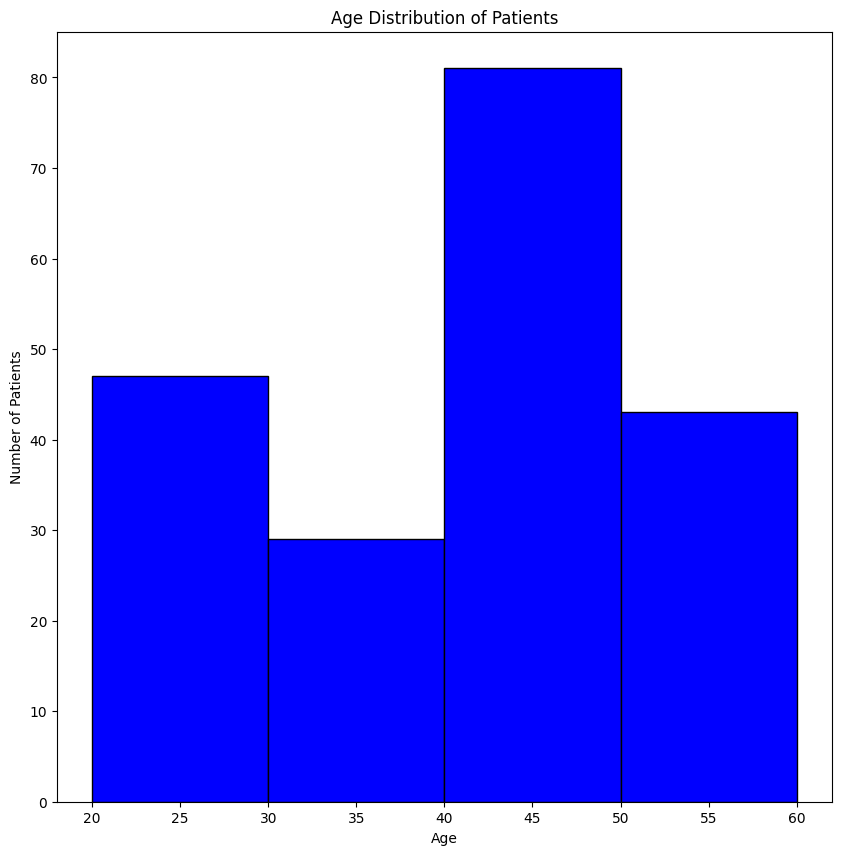

In [10]:
# ---
# Group No. 5
# 1. นาย พุฒิพงศ์ ขำสุวรรณ 6410450559
# 2. นาย ธนสาร วิริยะสุนทรวงศ์ 6410450460
# 3. นาย ศรัณย์ ธราพร 6410451857
# 4.
# ---

group = 5 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 2 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

data = pd.read_csv(data_path, sep='\s+', engine='python')

# คำนวณค่าเฉลี่ยของอายุของทั้งกลุ่ม
average_age = data['Age'].mean()

# สร้างฟังก์ชันเพื่อแทนค่า NaN ด้วยค่าเฉลี่ยของอายุของทั้งกลุ่ม
column_mean = data['Age'].mean()

# แทนค่า NaN (Not a Number) ด้วยค่าเฉลี่ยของคอลัมน์
data['Age'] = data['Age'].fillna(average_age)

# กำหนดตัวแปรมารับค่า data ก่อนที่ค่าจะถูกเปลี่ยนเป็นช่วงๆ
data1=data

# คำนวณการกระจายตัวของกลุ่มอายุ
age_groups = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60,])
age_distribution = age_groups.value_counts().sort_index()

# เปลี่ยนชื่อคอลัมน์
data = age_groups.value_counts().reset_index()
data.columns = ['Age Group', 'Number of Patients']

# ขนาดของกราฟเป็น 1000*1000
plt.figure(figsize=(10, 10))

# ตั้งชื่อกราฟ
plt.title("Age Distribution of Patients")

# กำหนดชื่อแกน
plt.xlabel("Age")
plt.ylabel("Number of Patients")

# สร้างตัวแปร data_Age เป็น list เพื่อมารับข้อมูลใน Age ของ Data1
data_Age=[]
for i2 in data1["Age"]:
  data_Age.append(i2)

# สร้างตัวแปร Range_Age ซึ่งกำหนดช่วงอายุต่ำสุดและสูงสุด เพื่อให้แบ่งเป็นช่วงให้พอดี 4 ช่วง โดยตั้งข้อมูลตัวแรกสุดเป็น 20 และตัวสุดท้ายเป็น 60
Range_Age=sorted(data_Age)
Range_Age[0]=20
Range_Age[len(Range_Age)-1]=60

# กำหนดค่าของแกนในแนวตั้งและแนวนอน
plt.xlim(0,20,60,5)

# กำหนดสีของแท่งกราฟ กำหนดช่วงแบ่งออกเป็น 4 ช่วง สีช่วงเป็นสีน้ำเงิน เส้นรอบรูปของแท่งกราฟเป็นสีดำ
plt.hist(Range_Age, bins=4, color="blue",edgecolor='black')

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()